In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px

In [49]:
train_df = pd.read_csv('../results/test-results_l-s_agent.csv')
test_df = pd.read_csv('../results/test-results_l-q_agent.csv')
train_df = train_df.head(50)

In [50]:
'''
Test statistics for the experiments:

Check the distribution of the number of timesteps for each of the algorithms
'''
def generateGraphs(train_df, test_df, experiment_name):
    width=800
    height=650
    labels = {'num_timesteps': 'Number Timesteps Required', 'probability density': 'Percentage of Games'}

    fig_ls = px.histogram(test_df, x="num_timesteps",
                      title="Distribution of number of timsteps, Testing Model",
                         width = width,
                         height=height,
                         histnorm="probability density",
                         labels=labels)
    fig_lq = px.histogram(train_df, x="num_timesteps",
                      title="Distribution of number of timsteps, Training Model",
                          width = width,
                         height=height,
                         histnorm="probability density",
                         labels=labels)

    combined = pd.DataFrame({'Train': train_df.num_timesteps,
                            'Test': test_df.num_timesteps})

    fig = px.ecdf(combined, x=['Train', 'Test'],
                  labels={'variable': 'Number Timesteps Required',
                         'value': 'Number of Timesteps',
                         'probability': 'Probability'}, 
                  width=width, height=height, 
                 marginal="histogram")
    fig1 = px.box(combined, 
                     y=['Train', 'Test'],
                 width=width,
                 height=height)
    
    fig.write_image(f'{experiment_name}_ecdf.png')
    fig1.write_image(f'{experiment_name}_box.png')
    

    print(len(combined))
    
    fig1.show()
    return fig

50


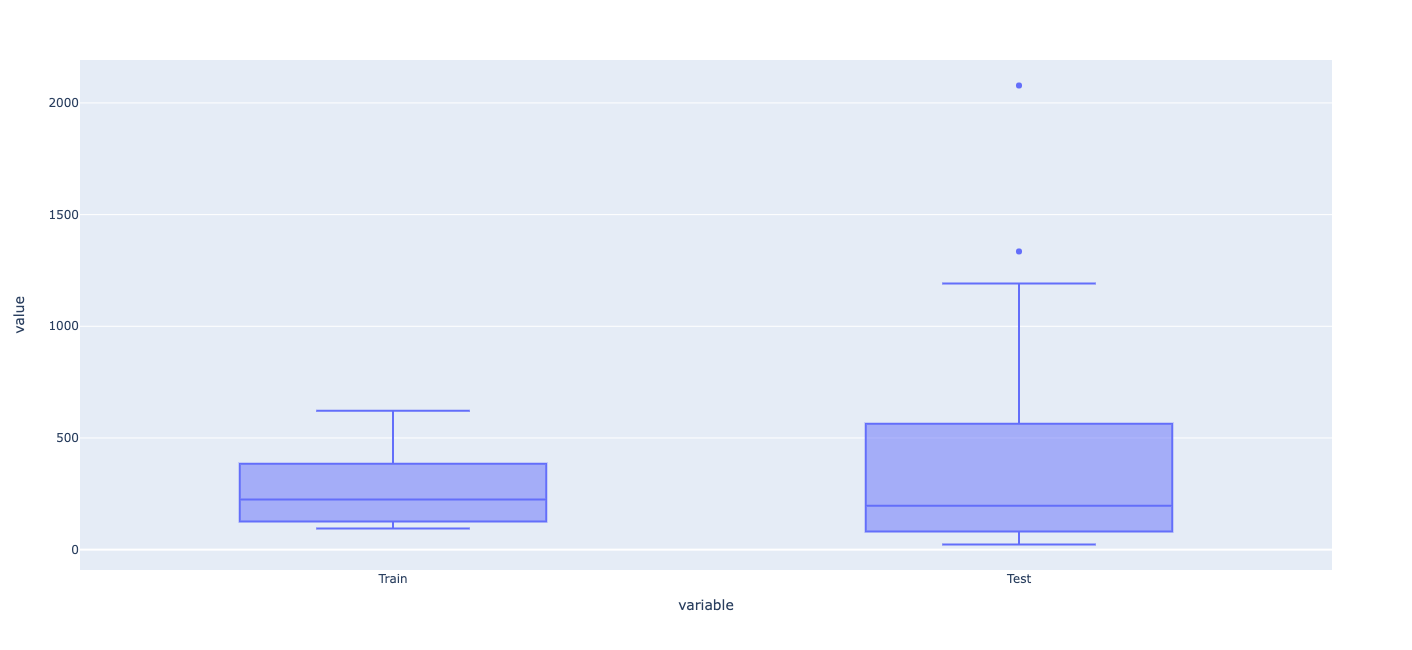

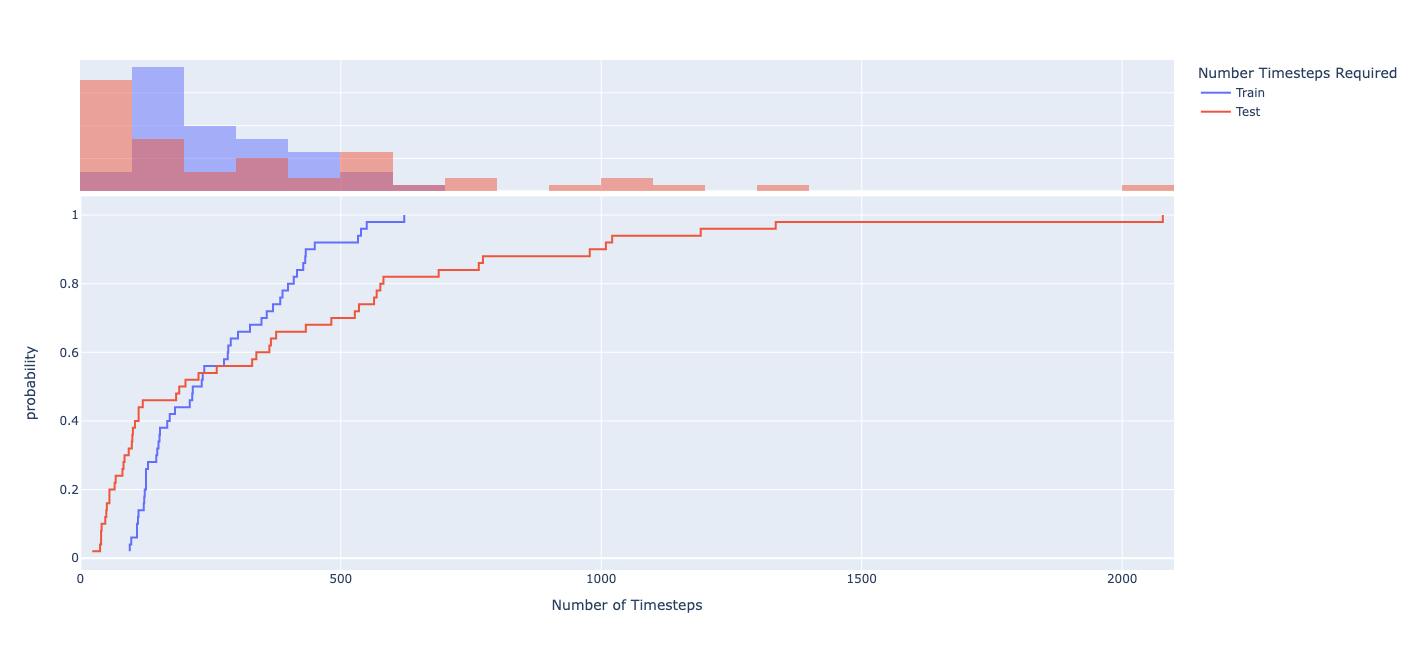

In [51]:
generateGraphs(train_df, test_df, 'Q-agent_L-track')

In [45]:
ls = pd.read_csv('o_sarsa.csv')
lq = pd.read_csv('results-q_o.csv')
f = generateGraphs(ls, lq, 'O_track')

FileNotFoundError: [Errno 2] File o_sarsa.csv does not exist: 'o_sarsa.csv'

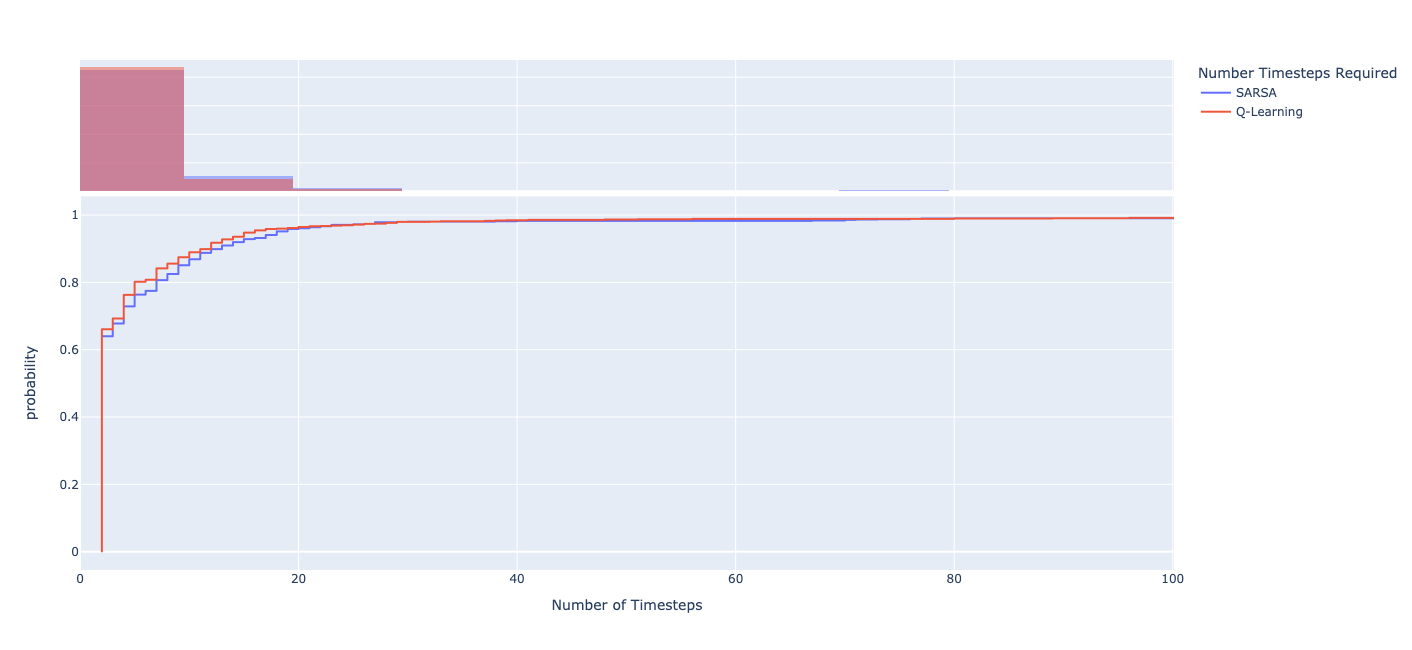

In [50]:
f.show()